In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
ONLINE_SHOPPERS = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [85]:
df = pd.read_csv(ONLINE_SHOPPERS)

#### Описание данных:

Administrative: количество страниц данного типа (административных), которые посетил пользователь.

Administrative_Duration: это количество времени, проведенное на этой категории страниц (административных).

Informational: количество страниц данного типа (информационных), которые посетил пользователь.

Informational_Duration: количество времени, проведенное на этой категории страниц (информационных).

ProductRelated: количество страниц этого типа (связанных с продуктом), которые посетил пользователь.

ProductRelated_Duration: количество времени, проведенное на этой категории страниц (связанных с продуктом).

BounceRates: процент посетителей, которые заходят на веб-сайт через эту страницу и уходят без выполнения каких-либо дополнительных задач.

ExitRates: процент просмотров страниц на веб-сайте, которые заканчиваются на этой конкретной странице.

PageValues: средняя ценность страницы, усредненная по ценности целевой страницы и/или завершению транзакции электронной коммерции.

SpecialDay: значение представляет близость даты просмотра к особым дням или праздникам (например, Дню матери или Дню святого Валентина), когда транзакция, скорее всего, будет завершена.

Month: содержит месяц просмотра страницы в строковой форме.

OperatingSystems: целочисленное значение, представляющее операционную систему, в которой пользователь работал при просмотре страницы.

Browser: целочисленное значение, представляющее браузер, который пользователь использовал для просмотра страницы.

Region: целочисленное значение, указывающее, в каком регионе находится пользователь.

TrafficType: целочисленное значение, представляющее, к какому типу трафика относится пользователь.
Подробнее о типах трафика читайте здесь.

VisitorType: строка, представляющая, является ли посетитель новым посетителем, вернувшимся посетителем или к другой категории.

Weekend: логическое значение, указывающее, приходится ли сеанс на выходной день.

Revenue: логическое значение, показывающее, совершил ли пользователь покупку.

In [86]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Исследование данных

In [87]:
df.shape

(12330, 18)

Исходная таблица содержит 18 столбцов и 12330 строк

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [89]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3348,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [90]:
df.duplicated().sum()

109

Таблица содержит 109 дубликатов, удалим их

In [91]:
df.drop_duplicates(inplace=True)

df.shape

(12221, 18)

In [92]:
df.reset_index(inplace=True, drop=True)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Работа с пропущенными значениями

In [93]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.628345
ProductRelated             0.000000
ProductRelated_Duration    4.001309
BounceRates                0.000000
ExitRates                  0.810081
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

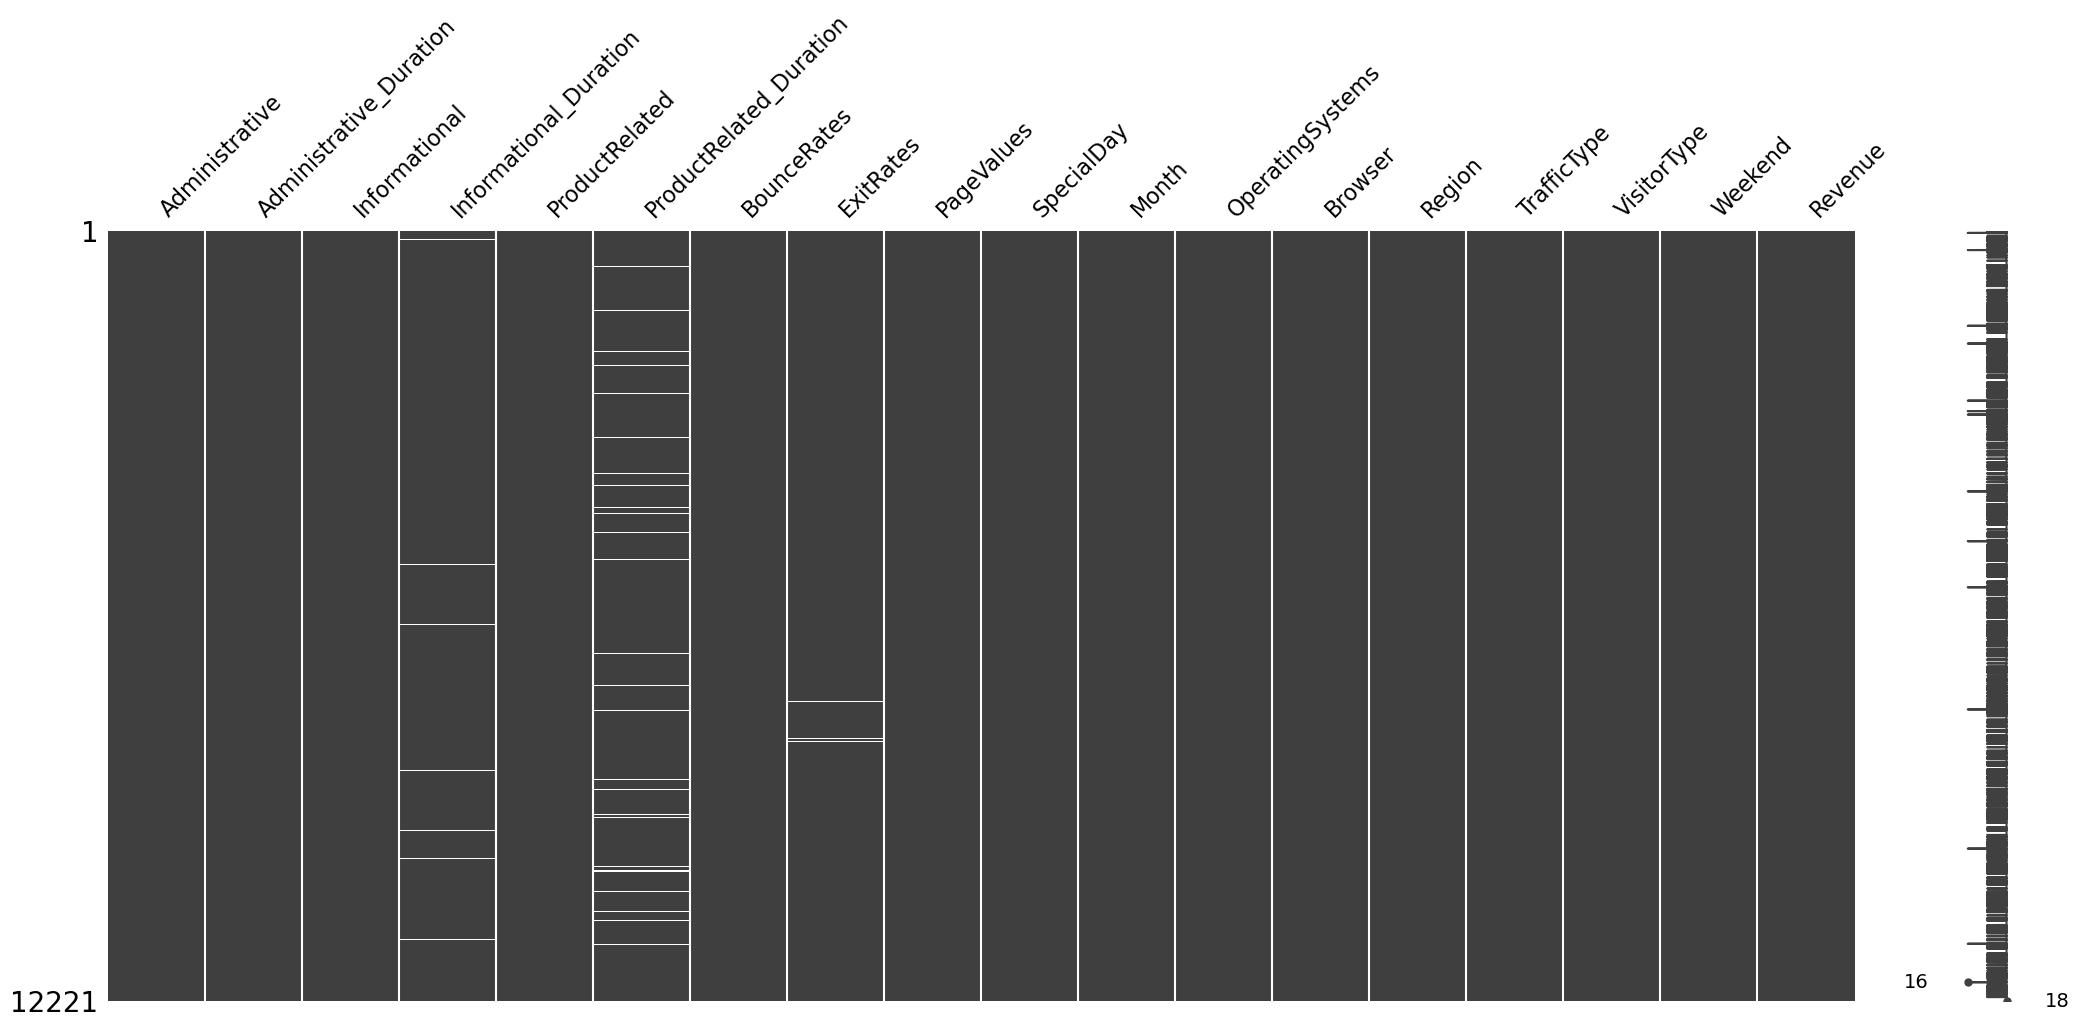

In [94]:
import missingno as msg
msg.matrix(df);

Пропуски имеются в трех столбцах - Informational_Duration, ProductRelated_Duration и ExitRates. При этом пропуски в разных строках, пропусков немного, потому не будем их никаким образом заполнять, а просто удалим.

In [95]:
df.dropna(ignore_index=True, inplace=True)

In [96]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11448 non-null  int64  
 1   Administrative_Duration  11448 non-null  float64
 2   Informational            11448 non-null  int64  
 3   Informational_Duration   11448 non-null  float64
 4   ProductRelated           11448 non-null  int64  
 5   ProductRelated_Duration  11448 non-null  float64
 6   BounceRates              11448 non-null  float64
 7   ExitRates                11448 non-null  float64
 8   PageValues               11448 non-null  float64
 9   SpecialDay               11448 non-null  float64
 10  Month                    11448 non-null  object 
 11  OperatingSystems         11448 non-null  int64  
 12  Browser                  11448 non-null  int64  
 13  Region                   11448 non-null  int64  
 14  TrafficType           

Осталось 11448 строк

In [98]:
# Numerical & Categorical columns
num_cols = [x for x in df.select_dtypes(include=np.number)]
cat_cols = [x for x in df.select_dtypes(exclude=np.number)]
print("В таблице", len(num_cols), "столбцов, содержащих числовые данные, и", len(cat_cols), "столбцов, содержащих категориальные данные\n")
print("Числовые:", num_cols)
print("Категориальные:", cat_cols)

В таблице 14 столбцов, содержащих числовые данные, и 4 столбцов, содержащих категориальные данные

Числовые: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Категориальные: ['Month', 'VisitorType', 'Weekend', 'Revenue']


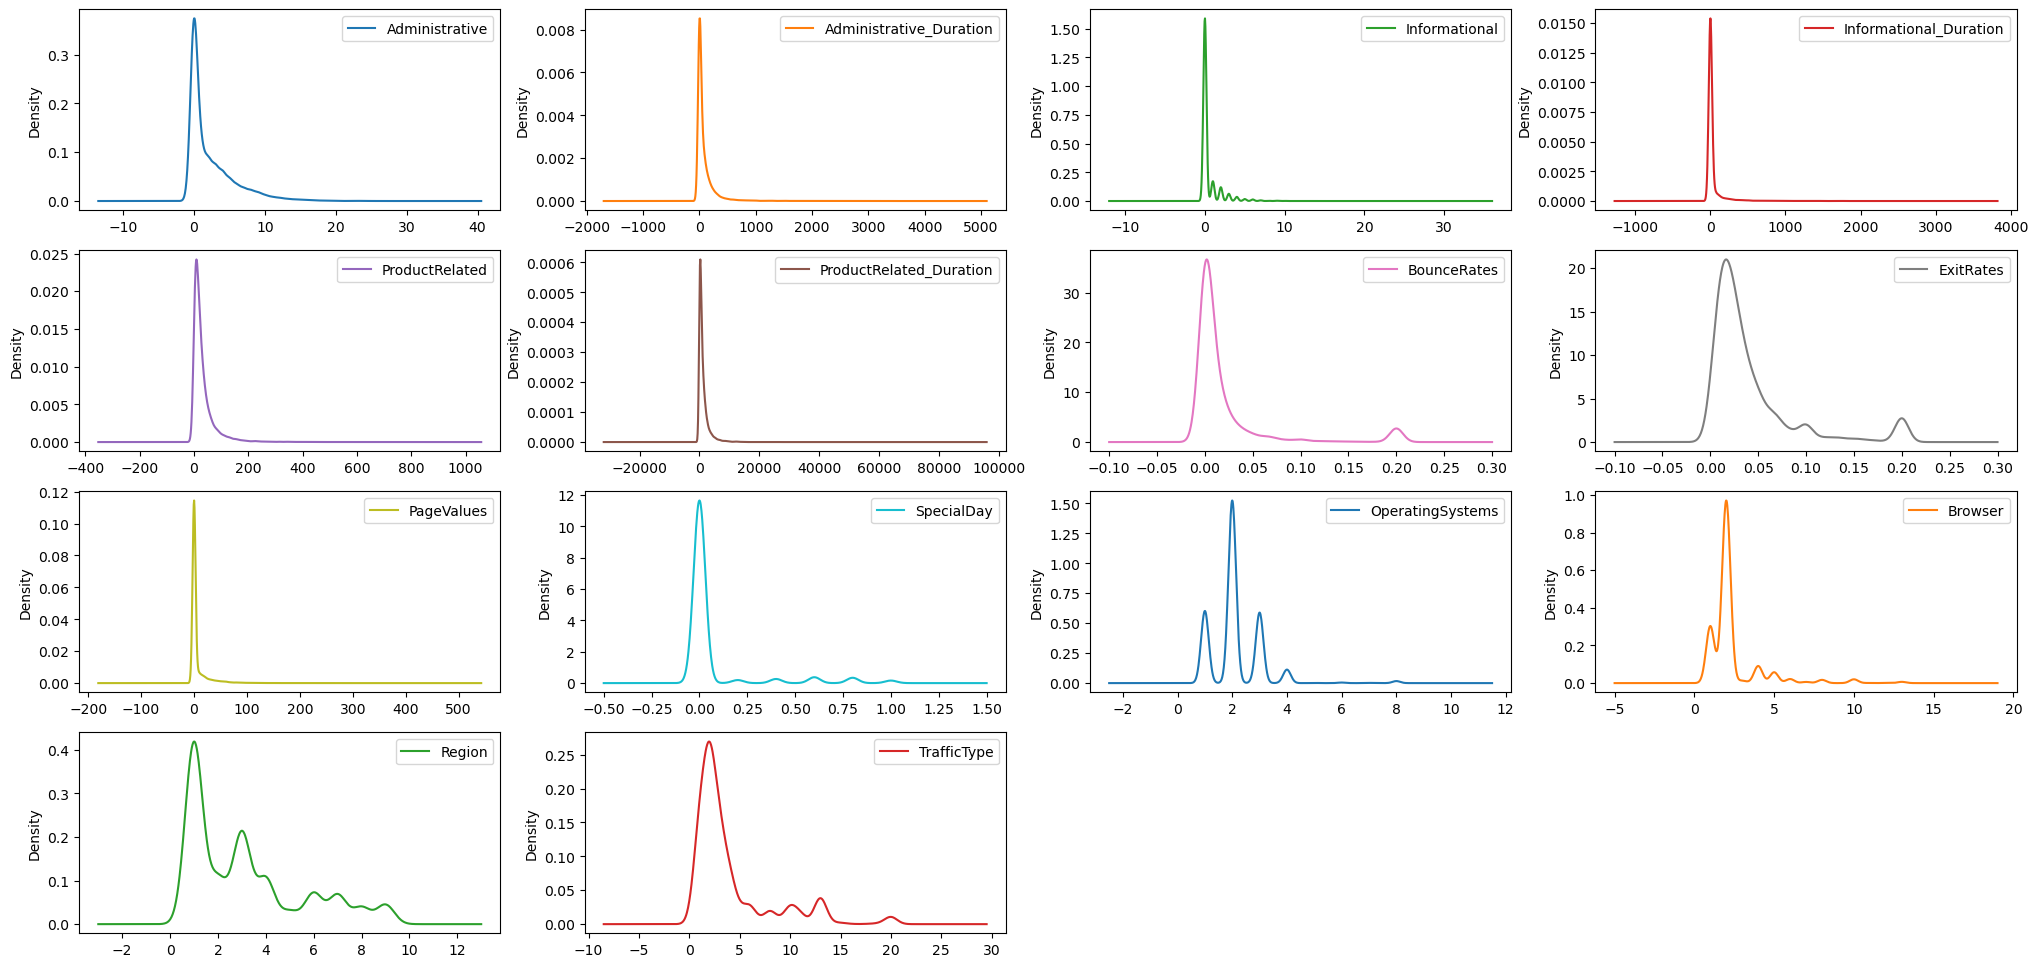

In [99]:
df[num_cols].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(25, 12));

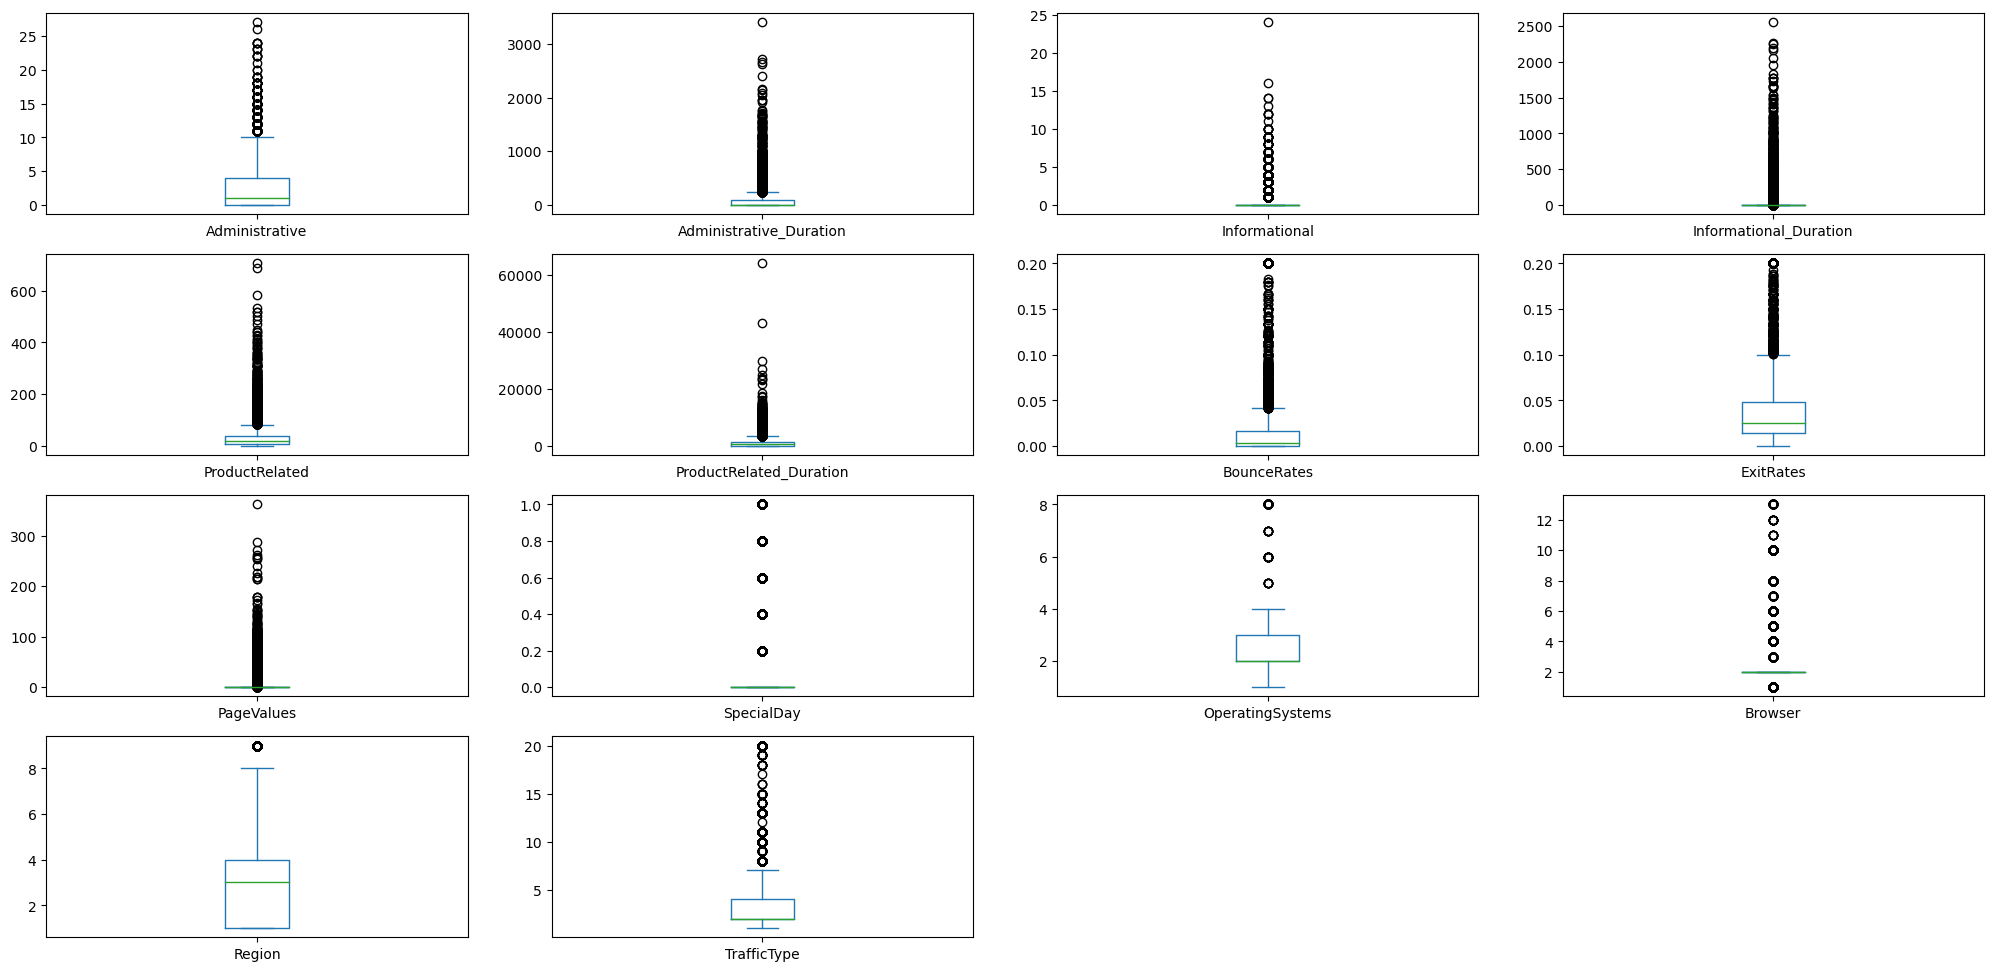

In [100]:
df[num_cols].plot(kind='box', subplots=True, layout=(4,4), sharex=False, figsize=(25, 12));

Вроде как аномальных/выпадающих значений не наблюдается

Проанализируем столбец с таргетным значением

In [101]:
df['Revenue'].value_counts()

Revenue
False    9678
True     1770
Name: count, dtype: int64

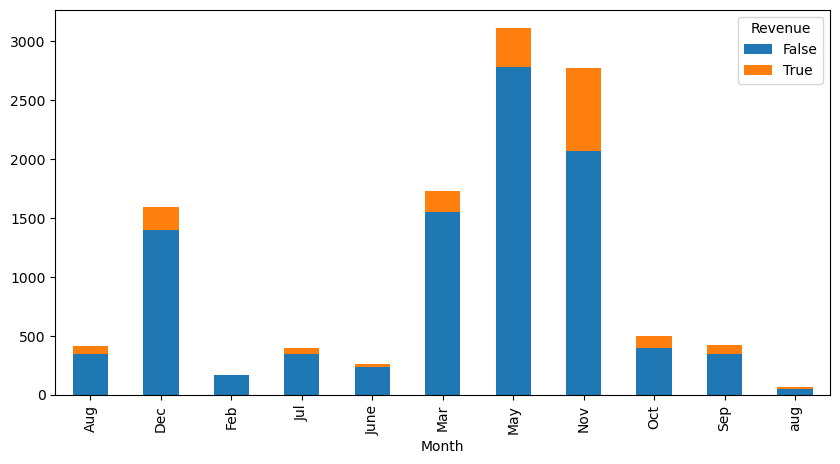

In [102]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5));

Больше всего заказов делают в ноябре

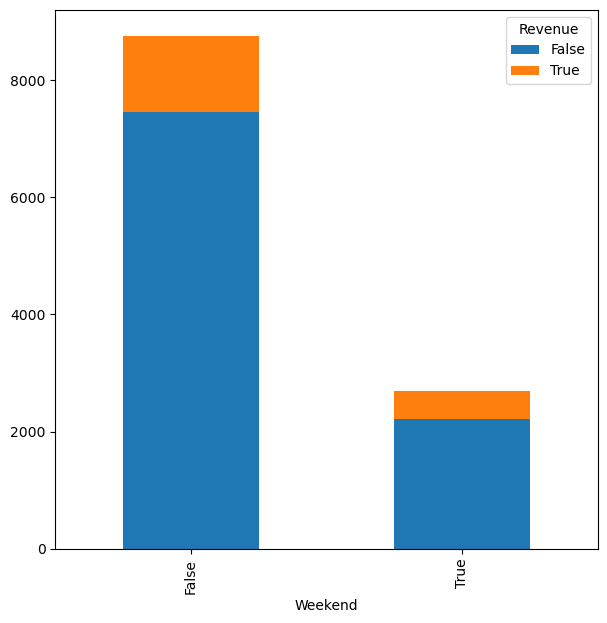

In [103]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7));

Особого преимущества у выходных перед рабочими днями не наблюдается

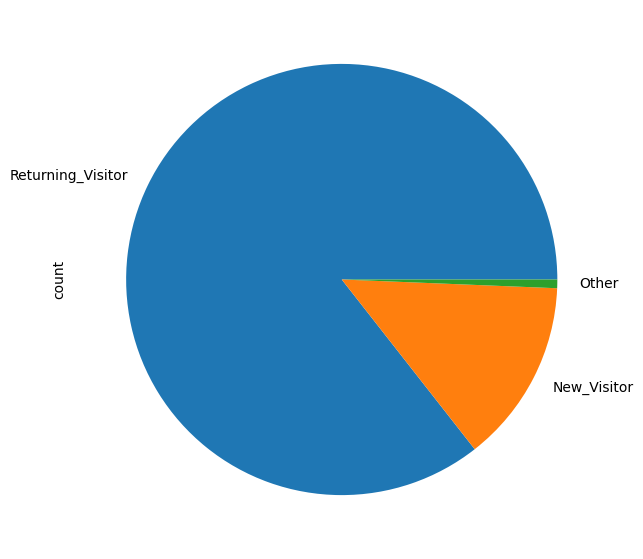

In [104]:
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7));

Подавляющую часть покупателей составляют те, которые ранее уже совершали покупки

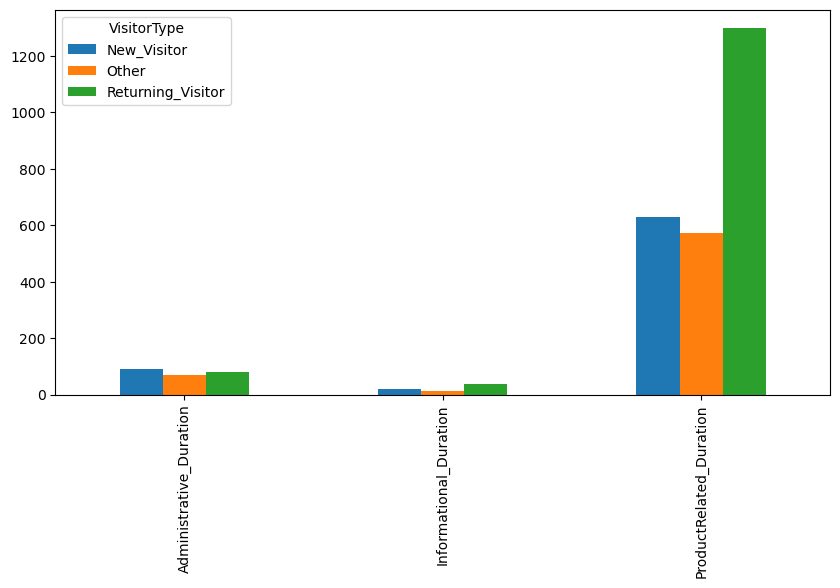

In [105]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5));

Чаще всего посещаются страницас описание товаров, особенно, повторными покупателями, видимо, они хорошо понимают, что ищут

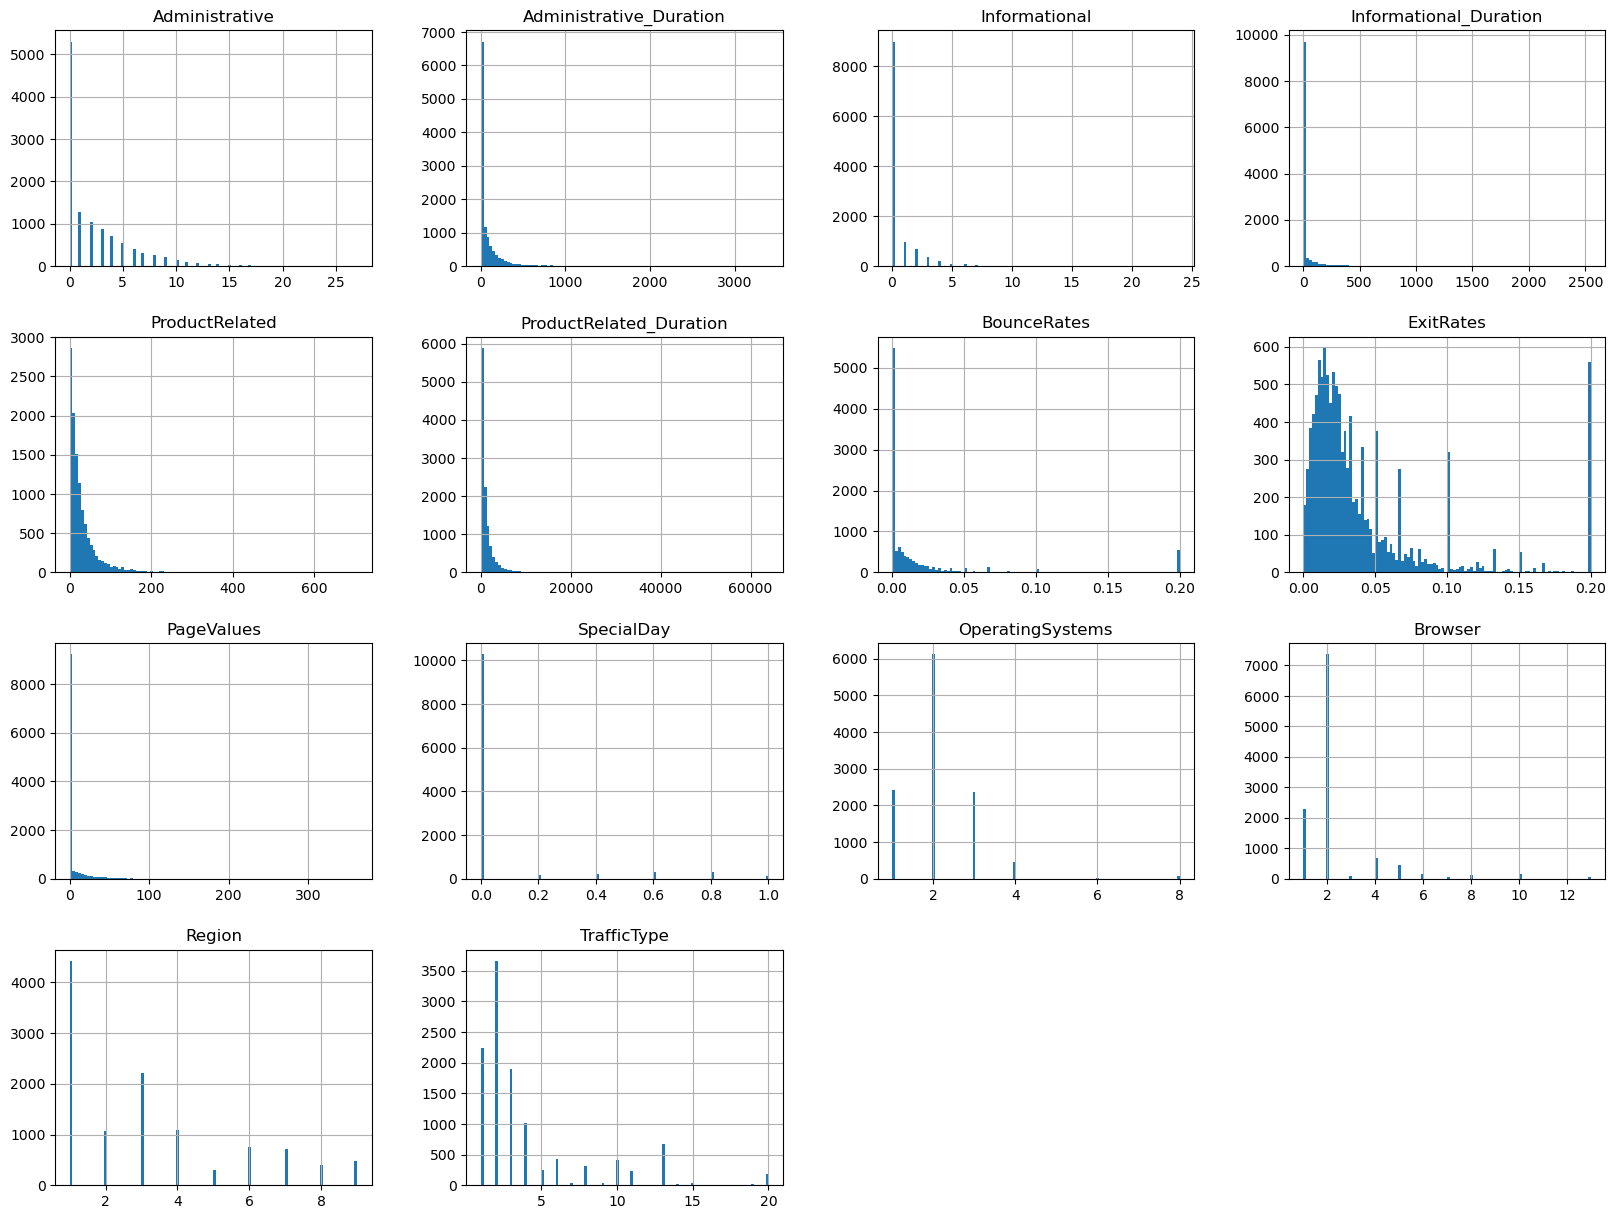

In [106]:
df.hist(bins=100, figsize=(20,15))
plt.show()

In [107]:
#Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
#df['Month']=df['Month'].map(Month)

#VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
#df['VisitorType']=df['VisitorType'].map(VisitorType)
#d={True:1,False:0}
#df['Weekend']=df['Weekend'].map(d)
#df['Revenue']=df['Revenue'].map(d)

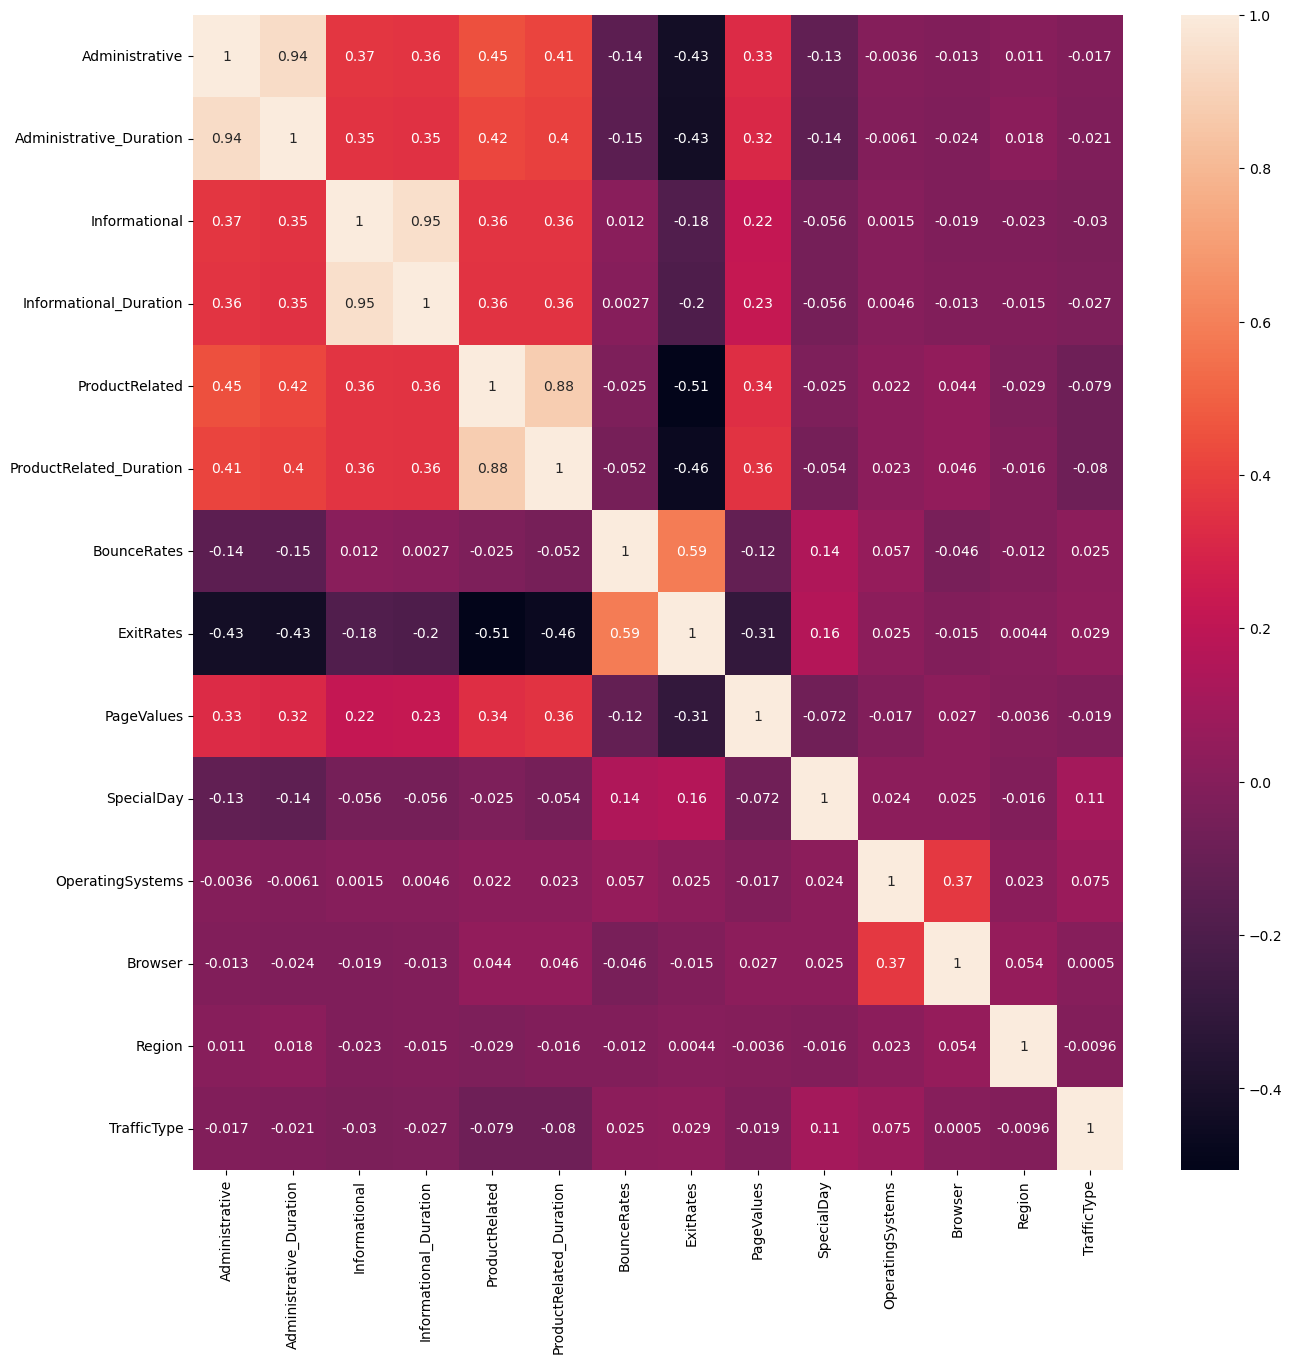

In [108]:
Var_Corr = df[num_cols].corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=num_cols, yticklabels=num_cols, annot=True);


Между данными в таблицы присутствуют как довольно сильные положительные корреляции, так и отрицательные

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11448 non-null  int64  
 1   Administrative_Duration  11448 non-null  float64
 2   Informational            11448 non-null  int64  
 3   Informational_Duration   11448 non-null  float64
 4   ProductRelated           11448 non-null  int64  
 5   ProductRelated_Duration  11448 non-null  float64
 6   BounceRates              11448 non-null  float64
 7   ExitRates                11448 non-null  float64
 8   PageValues               11448 non-null  float64
 9   SpecialDay               11448 non-null  float64
 10  Month                    11448 non-null  object 
 11  OperatingSystems         11448 non-null  int64  
 12  Browser                  11448 non-null  int64  
 13  Region                   11448 non-null  int64  
 14  TrafficType           

Посмотрим корреляции между категориальными признаками

In [110]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "bool" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Weekend,Revenue
Weekend,1.000000,0.028252
Revenue,0.028252,1.000000


In [111]:
df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,VisitorType
Month,1.000000,0.136714
VisitorType,0.136714,1.000000


Обе корреляции слабые

In [112]:
from scipy.stats import f_oneway
CategoryGroupLists = df.groupby('Weekend')['Revenue'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  0.0025021569730530593
Features are correlated


In [113]:
CategoryGroupLists = df.groupby('Month')['Revenue'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  5.967087297140942e-73
Features are correlated


In [114]:
CategoryGroupLists = df.groupby('VisitorType')['Revenue'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  3.1954948678701636e-28
Features are correlated


In [115]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if (df[c1].dtype == 'object' or df[c1].dtype == 'bool') and (df[c2].dtype != 'object' and df[c2].dtype != 'bool'):
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
5,Month,ProductRelated_Duration,Yes
6,Month,BounceRates,Yes
7,Month,ExitRates,Yes
8,Month,PageValues,Yes
9,Month,SpecialDay,Yes


Видим начие или отсутствие корреляций, но ничего о их величине, а соотвественно значимости, ничего сказать нельзя

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


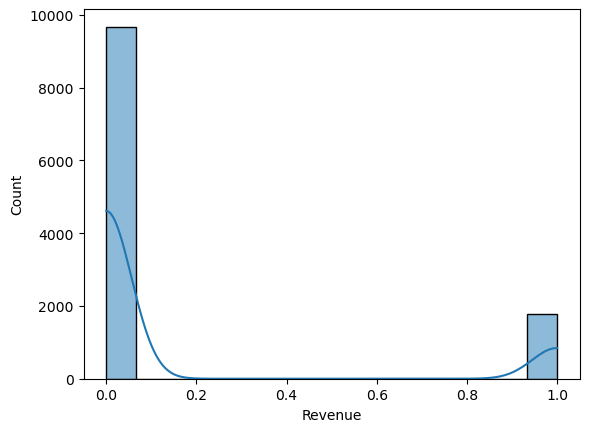

In [116]:
sns.histplot(data = df['Revenue'], kde = True);

По распределению таргетной величины видно, что лишь небольшая часть сессий заканчивается покупкой

### Сравнение pandas и polars

In [117]:
df_big = df.copy()

for i in range(88):
  df_big = pd.concat([df_big, df])

df_big.to_csv("online_shoppers_big.csv", index=False)

Увеличили количество строк в таблице

In [118]:
df_big.shape, df.shape

((1018872, 18), (11448, 18))

In [119]:
import polars as pl

print(pl.__version__)

0.18.8


In [120]:
%%time

df_pl = pl.read_csv("online_shoppers_big.csv")

CPU times: user 349 ms, sys: 177 ms, total: 526 ms
Wall time: 201 ms


In [121]:
%%time

df = pd.read_csv("online_shoppers_big.csv")

CPU times: user 606 ms, sys: 107 ms, total: 713 ms
Wall time: 745 ms


In [122]:
%%time

df[['Administrative_Duration', 'ProductRelated_Duration']]

CPU times: user 1.94 ms, sys: 1.79 ms, total: 3.72 ms
Wall time: 3.73 ms


,Administrative_Duration,ProductRelated_Duration
0,0.0,0.000000
1,0.0,64.000000
2,0.0,0.000000
3,0.0,2.666667
4,0.0,627.500000
...,...,...
1018867,145.0,1783.791667
1018868,0.0,465.750000
1018869,0.0,184.250000
1018870,75.0,346.000000


In [123]:
%%time

df_pl[['Administrative_Duration', 'ProductRelated_Duration']]

CPU times: user 31 µs, sys: 247 µs, total: 278 µs
Wall time: 1.17 ms


Administrative_Duration,ProductRelated_Duration
f64,f64
0.0,0.0
0.0,64.0
0.0,0.0
0.0,2.666667
0.0,627.5
0.0,154.216667
0.0,0.0
0.0,0.0
0.0,738.0


In [124]:
%%time

df.query('ProductRelated_Duration > 100.00')

CPU times: user 33.4 ms, sys: 22.3 ms, total: 55.7 ms
Wall time: 57.2 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
10,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018866,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
1018867,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
1018868,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
1018869,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False


In [125]:
%%time

df_pl.filter(pl.col('ProductRelated_Duration') > 100)

CPU times: user 47.6 ms, sys: 141 ms, total: 189 ms
Wall time: 137 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,"""Feb""",2,2,1,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,3,738.0,0.0,0.022222,0.0,0.4,"""Feb""",2,4,1,2,"""Returning_Visi…",false,false
0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,"""Feb""",1,1,3,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,16,407.75,0.01875,0.025833,0.0,0.4,"""Feb""",1,1,4,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,"""Feb""",1,1,1,3,"""Returning_Visi…",false,false
2,53.0,0,0.0,23,1668.285119,0.008333,0.016313,0.0,0.0,"""Feb""",1,1,9,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,13,334.966667,0.0,0.007692,0.0,0.0,"""Feb""",1,1,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,8,136.166667,0.0,0.008333,0.0,1.0,"""Feb""",2,2,5,1,"""Returning_Visi…",true,false


In [126]:
%%time

df[(df.Month == 'Feb') & (df.ProductRelated_Duration > 100)]

CPU times: user 36.2 ms, sys: 3.06 ms, total: 39.3 ms
Wall time: 36.9 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
10,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.0,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007587,0,0.0,0,0.0,7,666.000000,0.000000,0.014286,0.0,0.0,Feb,1,1,6,2,Returning_Visitor,False,False
1007588,1,0.0,0,0.0,21,405.709524,0.010744,0.047003,0.0,0.0,Feb,1,1,1,4,Returning_Visitor,False,False
1007589,0,0.0,0,0.0,6,163.250000,0.033333,0.033333,0.0,0.6,Feb,1,1,6,2,Returning_Visitor,False,False
1007590,0,0.0,0,0.0,17,284.250000,0.000000,0.011765,0.0,0.0,Feb,3,2,6,2,Returning_Visitor,True,False


In [127]:
%%time

df_pl.filter((pl.col('Month') == 'Feb') & (pl.col('ProductRelated_Duration') > 100))

CPU times: user 6.47 ms, sys: 4.14 ms, total: 10.6 ms
Wall time: 6.28 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,"""Feb""",2,2,1,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,3,738.0,0.0,0.022222,0.0,0.4,"""Feb""",2,4,1,2,"""Returning_Visi…",false,false
0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,"""Feb""",1,1,3,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,16,407.75,0.01875,0.025833,0.0,0.4,"""Feb""",1,1,4,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,"""Feb""",1,1,1,3,"""Returning_Visi…",false,false
2,53.0,0,0.0,23,1668.285119,0.008333,0.016313,0.0,0.0,"""Feb""",1,1,9,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,13,334.966667,0.0,0.007692,0.0,0.0,"""Feb""",1,1,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,8,136.166667,0.0,0.008333,0.0,1.0,"""Feb""",2,2,5,1,"""Returning_Visi…",true,false


In [128]:
%%time

df.groupby('Month').agg({'ProductRelated_Duration' : 'mean', 'ExitRates' : 'max'})

CPU times: user 34.8 ms, sys: 4.13 ms, total: 38.9 ms
Wall time: 38.4 ms


,ProductRelated_Duration,ExitRates
Month,,
Aug,1264.378610,0.2
Dec,1125.187515,0.2
Feb,466.930125,0.2
Jul,1173.952377,0.2
June,1217.414958,0.2
Mar,830.742609,0.2
May,989.113809,0.2
Nov,1773.897142,0.2
Oct,1133.800407,0.2


In [129]:
%%time

df_pl.groupby('Month').agg([pl.mean('ProductRelated_Duration'), pl.max('ExitRates')])

CPU times: user 28.4 ms, sys: 13.1 ms, total: 41.6 ms
Wall time: 41.7 ms


Month,ProductRelated_Duration,ExitRates
str,f64,f64
"""Dec""",1125.187515,0.2
"""Sep""",1173.764933,0.2
"""Nov""",1773.897142,0.2
"""June""",1217.414958,0.2
"""May""",989.113809,0.2
"""Aug""",1264.37861,0.2
"""Oct""",1133.800407,0.2
"""aug""",1084.898576,0.2
"""Jul""",1173.952377,0.2


В целом, для подавляющего числа задач polars быстрее pandas